log: ステップ数 100, 更新数値 1.984380410787449e-06
タイムステップ数: 107
誤差: 9.310253662197876e-06


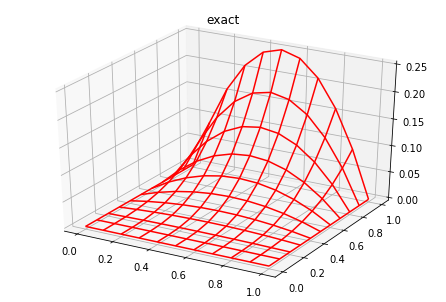

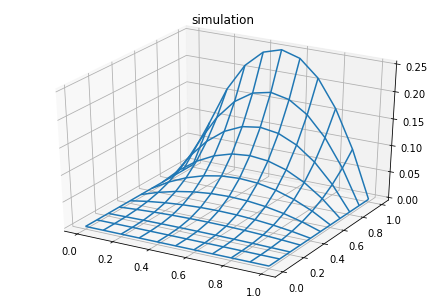

In [2]:
import copy

import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

num = 11
delta = 1 / (num - 1)
x = np.linspace(0, 1, num)
y = np.linspace(0, 1, num)
u = np.zeros((num, num), dtype='float64')
# init
for i in range(num):
    for j in range(num):
        if x[i] == 0 or y[j] == 0 or y[j] == 1:
            u[i, j] = 0
        elif x[i] == 1:
            u[i, j] = y[j] * (1 - y[j])

eps = 0.000001
stop = False
step = 0
while not stop:
    step += 1
    u_pre = copy.deepcopy(u)
    for i in range(num):
        for j in range(num):
            if x[i] == 0 or y[j] == 0 or y[j] == 1:
                u[i, j] = 0
            elif x[i] == 1:
                u[i, j] = y[j] * (1 - y[j])
            else:
                u[i, j] = (u[i + 1, j] + u[i - 1, j] + u[i, j + 1] + u[i, j - 1] -
                           delta ** 2 * (6 * x[i] * y[j] * (1 - y[j]) - 2 * x[i] ** 3)) / 4

    if step % 100 == 0:
        print(f'log: ステップ数 {step}, 更新数値 {np.linalg.norm(u - u_pre)}')

    if np.linalg.norm(u - u_pre) <= eps:
        stop = True

ans = np.zeros((num, num), dtype='float64')
for i in range(num):
    for j in range(num):
        ans[i, j] = x[i] ** 3 * y[j] * (1 - y[j])

X, Y = np.meshgrid(x, y)
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_wireframe(X, Y, ans, color='r')
ax.set_title('exact')
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_wireframe(X, Y, u)
ax.set_title('simulation')

print(f'タイムステップ数: {step}')
print(f'誤差: {np.linalg.norm(u - ans)}')